In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torchvision
import torchvision.transforms as transforms
import numpy as np
%matplotlib inline
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

# for reproducibility
random.seed(0)
torch.manual_seed(0)
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

다음 기기로 학습합니다: cuda


PIL image 함수

: centercrop, colorjitter,fivecrop,pad,greyscale,random-,resize,sclae,tencrop

*torchvision 안에 있는 데이터는 tensor 형태로 저장되어 있다


# Data splitting with Data Augmentation

In [ ]:
def toTensor(self,img):
        """convert a numpy array of shape HWC to CHW tensor"""
        img = img.transpose((2, 0, 1)).astype(np.float32)
        tensor = torch.from_numpy(img).float()
        return tensor/255.0

In [ ]:


transform = transforms.Compose([#transforms.ToPILImage(),
                                transforms.RandomResizedCrop(size=32,scale=(32,40)),
                                transforms.RandomHorizontalFlip(p=0.5),
                                #transforms.Resize(32),
                                #transforms.FiveCrop(24), # this is a list of PIL Images,
                                #transforms.ToTensor(),
                                #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                                #transforms.TenCrop(24), # this is a list of PIL Images / 튜플을 내놓게 된다는건데
                                #transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])), # returns a 4D tensor
                                #transforms.PILToTensor(),
                                #transforms.RandomCrop(32,padding=16),
                                #transforms.RandomCrop(32,padding=4),
                                #transforms.RandomHorizontalFlip(p=0.5),
                                
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                                #transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                #transforms.Lambda(lambda tensors:
                                #                  torch.stack([transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])(t) for t in tensors]))
                                
                           ])


"""ImageNet:
1) resized with the random number from[256,480] and cropped with the size of 224
2) random horizontal flip, per-pixel mean subtracted
3) color jittering

CIFAR-10
1) 4pixels zero padding
2) random horizontal flip
3) 32x32 crop



"""


'ImageNet:\n1) resized with the random number from[256,480] and cropped with the size of 224\n2) random horizontal flip, per-pixel mean subtracted\n3) color jittering\n\nCIFAR-10\n1) 4pixels zero padding\n2) random horizontal flip\n3) 32x32 crop\n\n\n\n'

In [ ]:


trainset = torchvision.datasets.CIFAR10(root='./data',train=True,transform=transform
                                        ,download=True, )

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
type(trainset.data)

numpy.ndarray

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=True)


In [ ]:
type(trainloader.dataset.data)


# get some random training images
dataiter = iter(trainloader)
 #iter는 원하는 값이 나올 때 까지 특정대상을 계속 돌림
images, labels = dataiter.next() #iter 다음에는 next로 부름
#print(images.shape) # 4개 짜리 미니배치, 이미지 사이즈는 (3,32,32)
#print(labels) # y가 숫자로 되어있고 그 숫자를 부르는 것임. 그래서label[j]가 필요

#validiter = iter(validloader)
#Xv, Yv = validiter.next()

display(type(images))
display(images.shape)
#display(images)

#display(type(Xv))
#display(Xv.shape)
#display(Yv)

torch.Tensor

torch.Size([128, 3, 32, 32])

#### Five,TenCrop 실시 할 때

In [ ]:
#TenCrop이나 FiveCrop 할 때는 이렇게 해야 함
#images_reshape = images.view(-1, 3, 24, 24)

In [ ]:
images_reshape.shape

torch.Size([10, 3, 24, 24])

In [ ]:
np.shape(trainset.data[0])

(32, 32, 3)

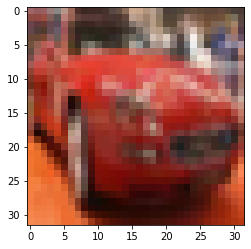

In [ ]:
plt.imshow(trainset.data[5])
plt.show()

In [ ]:
type(images)

torch.Tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


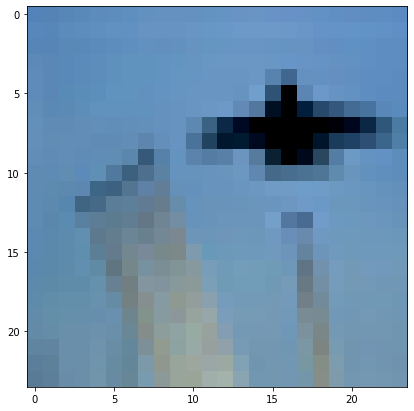

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


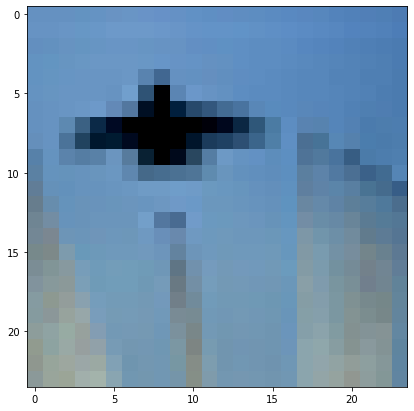

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


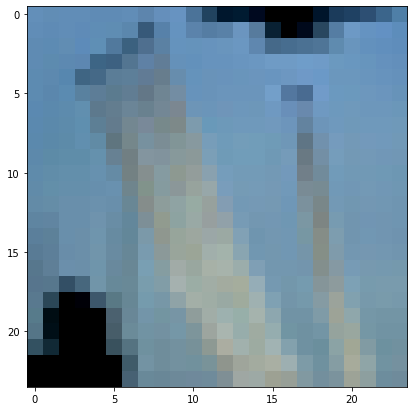

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


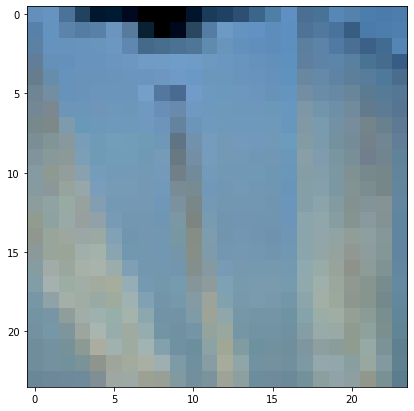

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


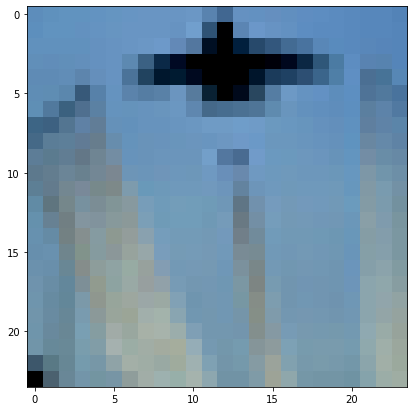

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


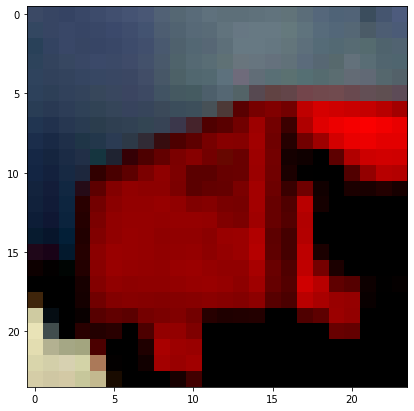

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


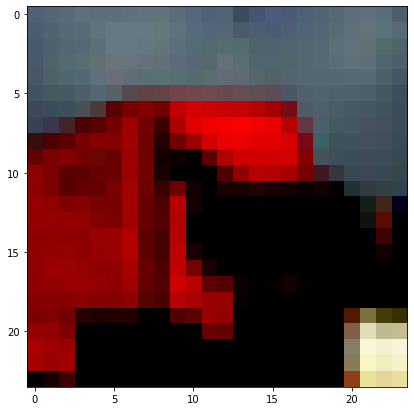

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


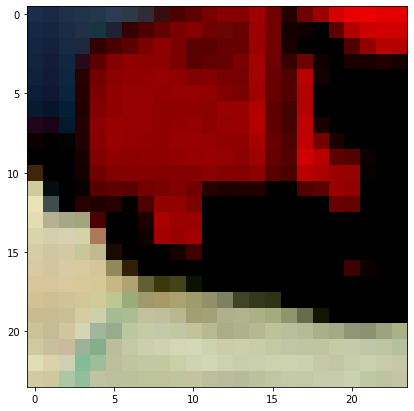

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


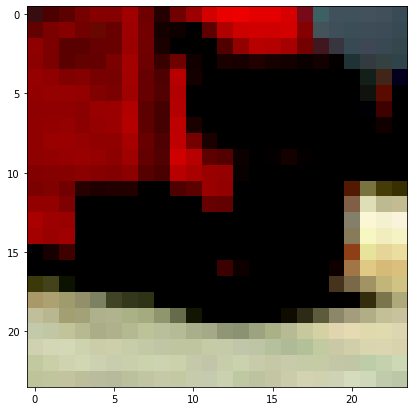

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


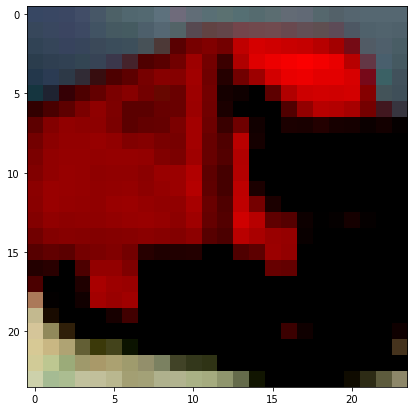

In [ ]:
for image in images_reshape:
  imshow(image)

In [ ]:
"""from itertools import chain, repeat
import random

length= 50000

np.random.seed(0)
p=list(repeat(1/length,length)) # N = #of total sample

#1.
num_list=np.arange(length)
train_index=np.random.choice(num_list,45000,replace=False,p=p) # dtype=ndarray
train_index=train_index.tolist() # dtype=list

#2.
valid_index=np.delete(num_list,train_index)

trainset_data=trainset.data[train_index]
validset_data=trainset.data[valid_index]

trainset.data=trainset_data"""

'from itertools import chain, repeat\nimport random\n\nlength= 50000\n\nnp.random.seed(0)\np=list(repeat(1/length,length)) # N = #of total sample\n\n#1.\nnum_list=np.arange(length)\ntrain_index=np.random.choice(num_list,45000,replace=False,p=p) # dtype=ndarray\ntrain_index=train_index.tolist() # dtype=list\n\n#2.\nvalid_index=np.delete(num_list,train_index)\n\ntrainset_data=trainset.data[train_index]\nvalidset_data=trainset.data[valid_index]\n\ntrainset.data=trainset_data'

In [ ]:
#validloader=torch.utils.data.DataLoader(validset_data, batch_size=128, shuffle=True, drop_last=False)

In [ ]:
display(trainset.__getitem__)
#display(trainset.__len__) #위와 같은 결과 나옴
display(trainset.class_to_idx,type(trainset.class_to_idx)) #class와 index의 딕셔너리
display(trainset.classes) #llist : class의 이름 (숫자말고)
display(trainset.data) #CiFAr10 train X data, (50000,3,32,32), ndarray
display(np.unique(trainset.targets)) #cifar10 train Y data, 숫자로 되어 있음, (50000)개,list 형태
display(trainset.transform)


<bound method CIFAR10.__getitem__ of Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               TenCrop(size=(24, 24), vertical_flip=False)
               RandomHorizontalFlip(p=0.5)
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )>

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

dict

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Compose(
    TenCrop(size=(24, 24), vertical_flip=False)
    RandomHorizontalFlip(p=0.5)
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)

In [ ]:
#trainloader 분석
print(trainset.data.shape)
print(trainloader.dataset.targets)
print(len(trainloader.dataset.targets))
#> y 변수 개수 : 50,000개
print(len(trainloader.dataset.targets)) 
#> y변수 종류
print(np.unique(trainloader.dataset.targets))
#> train set를 이용했나 묻는거임
print(trainloader.dataset.train)

#train loader 알아보기
print(type(trainloader.dataset))

print(len(trainset))
print(len(trainloader))
print(len(testset))
print(len(testloader))

display(trainloader.__getitem__)

(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6,

AttributeError: ignored

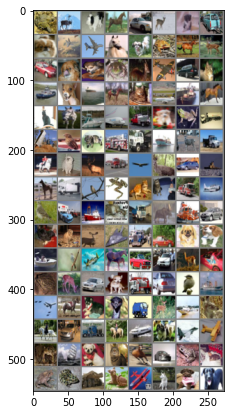

In [ ]:
def imshow(img): #img는 tensor
    img = img / 2 + 0.5     # unnormalize
    npimg=img.numpy()
    plt.figure(figsize=(7,7))
    plt.imshow(np.transpose(npimg, (1,2,0))) 
    plt.show()
    #첫번째 원소를 두번째, 두번째 원소를 마지막, 마지막 원소를 첫번째 위치로

# show images
imshow(torchvision.utils.make_grid(images))
#Make a grid of images.

#Args:
#    tensor (Tensor or list): 4D mini-batch Tensor of shape (B x C x H x W)  
#        or a list of images all of the same size.

#print(' '.join('%5s' % classes[labels[j]] for j in range(trainloader.batch_size)))

# Define CNN Architecture

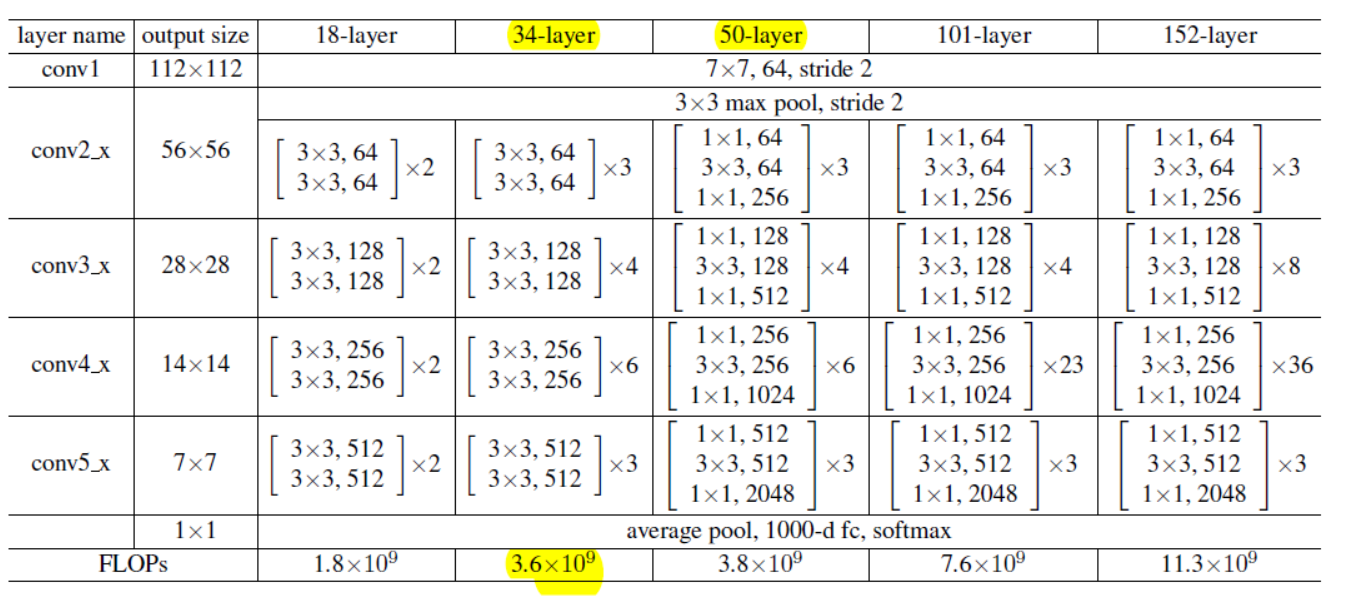

In [ ]:
from math import sqrt
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

      
        self.layer0 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1),
            torch.nn.ReLU())
        #(32,16)
        self.conv32_16 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU())
        
        self.maxpool=torch.nn.MaxPool2d(kernel_size=2,stride=2)

        self.conv16_32_1 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())
            #(32,32,16)

        self.conv16_32_2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())        
        
        self.conv8_64_1 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU()) 

        self.conv8_64_2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())                   
     
        # (128, 4, 4, 64)
      

        self.avg_pool=torch.nn.AvgPool2d(kernel_size=4,stride=0)
        #(128,1,1,64)

        self.fc=torch.nn.Linear(1*1*64,10, bias=True)       
        torch.nn.init.normal_(self.fc.weight,std=sqrt(2/10))

        self.result_layer=torch.nn.Softmax()
        
                 
        # 전결합층 한정으로 가중치 초기화
        #torch.nn.init.normal_(self.result_layer.weight,std=sqrt(2/10))

    def forward(self, x):
        out = self.layer0(x) #(32,16) 
        out = self.conv32_16(out) + out #(32,32,16) 
        out = self.conv32_16(out) + out 
        out = self.conv32_16(out) + out
        
        out = self.maxpool(out) #(16,16)
        
        out = self.conv16_32_1(out)  #(16,32) 
        out = self.conv16_32_2(out) + out 
        out = self.conv16_32_2(out) + out 

        out = self.maxpool(out) #(8,32)

        out = self.conv8_64_1(out) #(8,64)
        out = self.conv8_64_2(out) + out
        out = self.conv8_64_2(out) + out

        out = self.maxpool(out) #(4,64)

        out= self.avg_pool(out) #(1,64)
        
        out = out.view(-1,1*1*64)    # 전결합층을 위해서 Flatten
        out = self.fc(out)

        out = self.result_layer(out)
        return out

#### More Detailed one

In [ ]:
from math import sqrt
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

      
        self.layer0 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,stride=1,padding=1),
            torch.nn.ReLU())
        #(32,16)
        self.conv32_16 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU())
        
       

        self.conv16_32_1 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())
            #(32,32,16)

        self.conv16_32_2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU())        
        
        

        self.conv8_64_1 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU()) 

        self.conv8_64_2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU())                   
     
        # (128, 4, 4, 64)
      

        self.avg_pool=torch.nn.AvgPool2d(kernel_size=8,stride=0)
        #(128,1,1,64)

        self.fc=torch.nn.Linear(1*1*64,10, bias=True)       
        torch.nn.init.normal_(self.fc.weight,std=sqrt(2/10))

        self.result_layer=torch.nn.Softmax()
        
                 
        # 전결합층 한정으로 가중치 초기화
        #torch.nn.init.normal_(self.result_layer.weight,std=sqrt(2/10))

    def forward(self, x):
        out = self.layer0(x) #(32,16) 
        out = self.conv32_16(out) + out #(32,32,16) 
        out = self.conv32_16(out) + out 
        out = self.conv32_16(out) + out
        out1=out.view(-1,128*16*32*32)
        linear1=torch.nn.Linear(in_features=out1.shape[0]*out1.shape[1],
                               out_features=128*32*16*16)
        out = torch.nn.functional.pad(out,(0,1,0,1))
        
        out = self.conv16_32_1(out)+ linear1 #(16,32) 
        out = self.conv16_32_2(out) + out 
        out = self.conv16_32_2(out) + out 

        out2=out.view(-1,128*32*16*16)
        linear2=torch.nn.Linear(in_features=out2.shape[0]*out2.shape[1],
                               out_features=128*64*8*8)
        out = torch.nn.functional.pad(out,(0,1,0,1))

        out = self.conv8_64_1(out) + linear2 #(8,64)
        out = self.conv8_64_2(out) + out
        out = self.conv8_64_2(out) + out

        out= self.avg_pool(out) #(1,64)
        
        out = out.view(-1,1*1*64)    # 전결합층을 위해서 Flatten
        out = self.fc(out)

        out = self.result_layer(out)
        return out

## 3. Define a Loss function and optimizer

### Hyperparmeter


In [ ]:
import torch.optim as optim

training_epochs=5
learning_rate=0.1
train_batch = len(trainloader)
#valid_batch = len(validloader)

In [ ]:
# CNN 모델 정의
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0001)

# Training

In [ ]:
print(f'총 Epochs 수 = {training_epochs}')
accuracy=[]
loss=[]
for epoch in range(training_epochs):
    train_cost = 0
    valid_cost = 0

    for Xt, Yt in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        Xt=Xt.to(device)
        Yt=Yt.to(device)
        
        # TenCrop, FiveCrop 시
        #Xt=Xt.view(-1, 3, 24, 24)
        
        #for x in Xt:
        #  class_outputs=[]
        #  class_outputs.append(model(x))


        #validiter=iter(validloader)
        #Xv, Yv = validiter.next()
        #Xv=Xv.to(device)
        #Yv=Yv.to(device)
        #mean_outputs=class_outputs.mean()
        optimizer.zero_grad()
        train_outputs = model(Xt)
        #valid_outputs = model(Xv)
        train_loss = criterion(train_outputs, Yt)
        #valid_loss = criterion(valid_outputs, Yv)
        train_loss.backward()
        optimizer.step()

        train_cost += train_loss / train_batch
        #valid_cost += valid_loss / valid_batch
        train_pred = model.forward(Xt)
        #valid_pred = model.forward(Xv) # forward 연산
        train_correct = torch.argmax(train_pred, 1) == Yt
        #valid_correct = torch.argmax(valid_pred, 1) == Yv
        train_accuracy = train_correct.float().mean()
        #valid_accuracy = valid_correct.float().mean()

  #어차피 softmax 함수 결과값의 크기는 그전에 dot product의 크기와 비례하기 때문이다.
    accuracy.append(train_accuracy)
    loss.append(train_cost)
    print(f'[Epoch: {epoch+1}] / train: (cost = {train_cost} , accuracy = {train_accuracy}) ')

총 Epochs 수 = 5


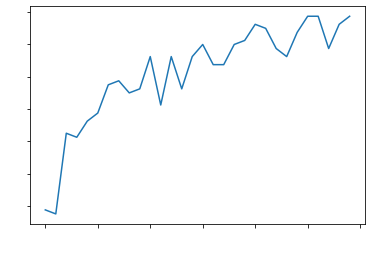

In [ ]:
plt.plot(accuracy)
plt.yticks(color='white')
plt.xticks(color='white')
plt.xlabel('Epochs',color='white')
plt.show()

In [ ]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

# Test

In [1]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

NameError: ignored

In [ ]:
outputs = net(images)

In [ ]:
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))